### Topic: Demon algorithm
### Author: Ivana Benova
### Last edits: 03.05.2021

In [1]:
#importation of libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from scipy import optimize
from scipy.optimize import curve_fit
import seaborn as sns

### Definition of functions

In [2]:
'''Entropy function
    Inputs: nj - numpy array, vector of numbers of elements on levels,
    
    Outputs: integer, entropy'''
def entropy(nj):
    
    nj = nj[nj != 0]
    N = nj.sum()
    return N*np.log(N) - N + 1 - (nj*np.log(nj)-nj).sum()

In [3]:
'''Calculation of energy of system, sum of energiy of levels times number of elements on levels
    Inputs: levels - numpy array, vector of values of energy levels,
            elements_on_levels - numpy array, vector of numbers of elements on levels,
    
    Outputs: integer, energz of system'''
def energy_of_system(levels, elements_on_levels):
    return (levels*elements_on_levels).sum()

In [4]:
'''Initialization of system, locating as many elements as possible on largest levels
    Inputs: N - integer, number of elements in the system, 
            E - integer, set given energy of the system,
            M - integer, number of energy levels
            
    Outputs: levels - numpy array, vector of values of energy levels
             elements_on_levels - numpy array, vector of numbers of elements on levels,
             e - integer, energy of demon after initialization'''
def initialisation(N,E,M):
    
    levels = np.arange(0,M)
    elements_on_levels = np.zeros(M)
    
    e = E
    n = N
    for i in np.arange(M-1,-1,-1):
        if i == 0:
            elements_on_levels[i] = n
        else:
            if e//levels[i] <= n:
                elements_on_levels[i] = e//levels[i]
            else:
                elements_on_levels[i] = n
        n -= elements_on_levels[i]
        e = E - energy_of_system(levels, elements_on_levels)
    return levels, elements_on_levels, e

In [5]:
'''Demon algorithm,
    Inputs: seed - integer, random seed,
            levels - numpy array, vector of values of energy levels,
            elements_on_levels - numpy array, vector of numbers of elements on levels,
            e - integer, energy of demon after initialization,
            num_it - integer, number of iterations, 
            
    Outputs: levels-numpy array, vector of values of energy levels,
             elements_on_levels-numpy array, vector of numbers of elements on levels,
             demon - numpy array, vector of values of energy og demon through iterations, 
             Entropy - numpy array, vector of entropies of the system through iterations, 
             Ns_avg - numpy array, distribution of elements on levels averaged over states with zero demon energy'''
def demon_algorithm(seed, levels, elements_on_levels, e, num_it):

    
    np.random.seed(seed)
    it = 0
    demon = np.array([e])
    Entropy = np.array([entropy(elements_on_levels)])
    cnt_avg = 0
    Ns_avg = np.zeros(M)
    
    while it < num_it:
        
        if demon[-1] == 0:
            Ns_avg += elements_on_levels
            cnt_avg += 1
            
        old_level = np.random.randint(0,M)
        while elements_on_levels[old_level] <= 0:
            old_level = np.random.randint(0,M)
        new_level = np.random.randint(0,M)
        while old_level == new_level:
            new_level = np.random.randint(0,M)
        
        E0 = energy_of_system(levels, elements_on_levels)
        elements_on_levels[old_level] -= 1
        elements_on_levels[new_level] += 1
        E1 = energy_of_system(levels, elements_on_levels)
        delta_E = E0 - E1
    
        if delta_E > 0:
            it += 1
            demon = np.append(demon, demon[-1]+delta_E)
            Entropy = np.append(Entropy, entropy(elements_on_levels))
        else:
            if -delta_E <= demon[-1]:
                it += 1
                demon = np.append(demon, demon[-1]+delta_E)
                Entropy = np.append(Entropy, entropy(elements_on_levels))
            else:
                it += 1
                elements_on_levels[old_level] += 1
                elements_on_levels[new_level] -= 1
                demon = np.append(demon, demon[-1])
                Entropy = np.append(Entropy, entropy(elements_on_levels))
        
    if cnt_avg > 0:
        Ns_avg = Ns_avg/cnt_avg
    return levels, elements_on_levels, demon, Entropy, Ns_avg

### Simulations

In [6]:
# N - number of elements, E-energy of system, M- number of energy levels,
# seed - random seed, num_it - number of iterations of demon algorithm
N = 50
E = 100
M = 11
seed = 12345
num_it = 50000

In [7]:
#initialization
levels, elements_on_levels, e = initialisation(N,E,M)
levels, elements_on_levels, e

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([40.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 0.0)

In [8]:
#demon algorithm
levels, elements_on_levels, demon, Entropy, Ns_avg = demon_algorithm(seed, levels, elements_on_levels, e, num_it)

In [9]:
from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

### Graphs of simulation

Text(0, 0.5, 'number of elements')

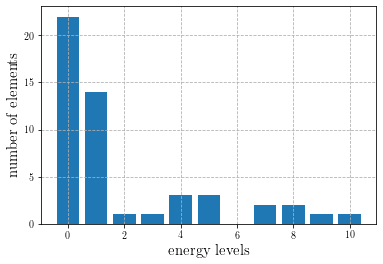

In [10]:
# distribution of elements on levels after num_it iterations
plt.bar(levels, elements_on_levels)
plt.grid(ls="--")
plt.xlabel(r"energy levels", size=15)
plt.ylabel(r"number of elements", size=15)
#plt.savefig('elements_distribution_100_1000_11.png')

Text(0, 0.5, 'number of elements in log scale')

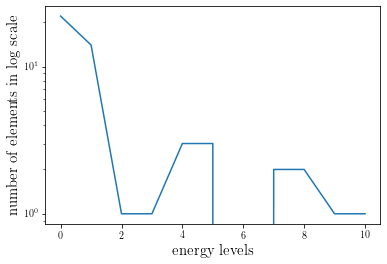

In [11]:
# distribution of elements on levels after num_it iterations in log scale
plt.semilogy(levels, elements_on_levels)
plt.xlabel(r"energy levels", size=15)
plt.ylabel(r"number of elements in log scale", size=15)
#plt.savefig('log_elements_distribution_100_1000_11.png')

(array([ 0.,  5., 10., 15., 20., 25.]), <a list of 6 Text yticklabel objects>)

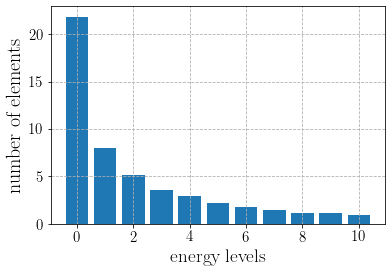

In [12]:
# distribution of elements on levels averaged over states with zero demon energy
plt.bar(levels, Ns_avg)
plt.grid(ls="--")
plt.xlabel(r"energy levels", size=19)
plt.ylabel(r"number of elements", size=20)
plt.xticks( fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig('elements_distribution_50_400_11.png')

In [13]:
# entropy of the system
entropy(Ns_avg)

93.07273441669687

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 <a list of 6 Text yticklabel objects>)

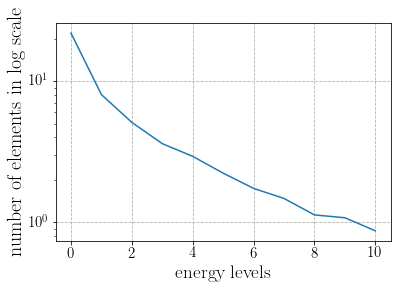

In [14]:
# distribution of elements on levels averaged over states with zero demon energy in log scale
plt.semilogy(levels, Ns_avg)
plt.xlabel(r"energy levels", size=19)
plt.ylabel(r"number of elements in log scale", size=20)
plt.grid(ls="--")
plt.xticks( fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig('log_elements_distribution_50_300_11.png')

(array([ 20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 9 Text yticklabel objects>)

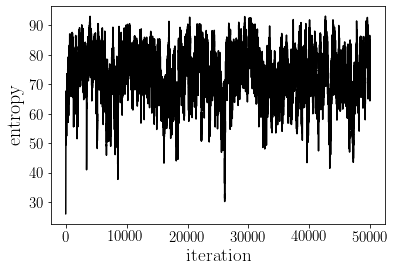

In [15]:
# entropy of system through iterations
plt.plot(np.arange(0,len(Entropy)), Entropy, color = 'black')
plt.xlabel(r"iteration", size = 19)
plt.ylabel(r"entropy", size = 20)
plt.xticks( fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig('entropy_50_400_11.png')

Text(0, 0.5, 'demon energy')

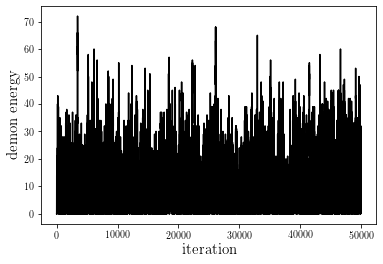

In [16]:
# energy of demon through iterations
plt.plot(np.arange(0,(num_it+1)), demon, color = 'black')
plt.xlabel(r"iteration", size = 15)
plt.ylabel(r"demon energy", size = 15)

### Demon distribution and approximation of PDF

In [17]:
# approximation of histogram of demon values
bin = 30
bins = np.arange(bin)

def exp_approx(x,c1, c2):
    return (c2*np.exp(-c1*x))

counts = np.histogram(demon, bins = bins)[0]
sum = np.sum(counts)
counts = counts/sum
level = np.histogram(demon, bins = bins)[1]
energy_levels = np.zeros(bin-1)
for i in np.arange(bin-1):
    energy_levels[i] = (level[i+1]+level[i])/2
popt, pcov = curve_fit(exp_approx, energy_levels, counts)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


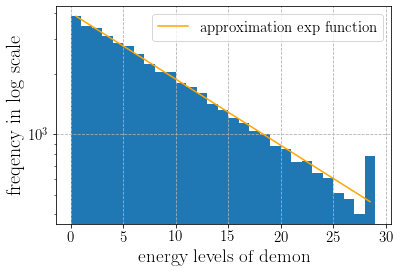

In [18]:
# histogram of demon and approximation function in log scale
plt.hist(demon, bins=bins)
#np.arange(55)
plt.plot(energy_levels, sum*(exp_approx(energy_levels,popt[0],popt[1])), color = 'orange', label ="approximation exp function")
plt.grid(ls="--")
plt.yscale("log")
plt.xlabel(r"energy levels of demon", size = 19)
plt.ylabel(r"freqency in log scale", size = 20)
plt.xticks( fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize = 15 )
#plt.savefig('log_demon_50_100_11.png')

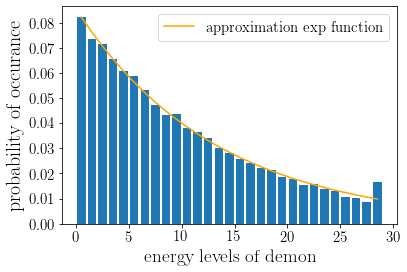

In [19]:
# histogram of demon and approximation function
plt.bar(energy_levels, counts)
plt.plot(energy_levels, (exp_approx(energy_levels,popt[0],popt[1])), color = 'orange', label ="approximation exp function")
plt.xlabel(r"energy levels of demon", size = 19)
plt.ylabel(r"probability of occurance", size = 20)
plt.xticks( fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize = 15 )
#plt.savefig('demon_50_400_11.png')

### Simulations for systems with E = 100, 200, 300, 400

In [20]:
N = 50
E = 200
M = 11
seed = 12345
num_it = 50000

In [21]:
levels_200, elements_on_levels_200, e_200 = initialisation(N,E,M)
levels_200, elements_on_levels_200, demon_200, Entropy_200, Ns_avg_200 = demon_algorithm(seed,\
                                                levels_200, elements_on_levels_200, e_200, num_it)

In [22]:
N = 50
E = 300
M = 11
seed = 12345
num_it = 50000

In [23]:
levels_300, elements_on_levels_300, e_300 = initialisation(N,E,M)
levels_300, elements_on_levels_300, demon_300, Entropy_300, Ns_avg_300 = demon_algorithm(seed,\
                                                levels_300, elements_on_levels_300, e_300, num_it)

In [24]:
N = 50
E = 400
M = 11
seed = 12345
num_it = 50000

In [25]:
levels_400, elements_on_levels_400, e_400 = initialisation(N,E,M)
levels_400, elements_on_levels_400, demon_400, Entropy_400, Ns_avg_400 = demon_algorithm(seed,\
                                                levels_400, elements_on_levels_400, e_400, num_it)

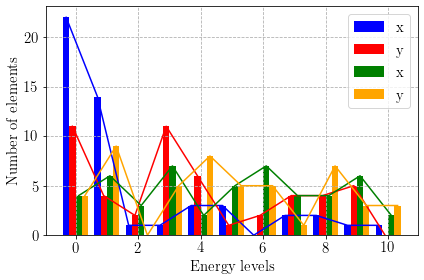

In [26]:
# distribution of elements
plt.bar(levels-0.3, elements_on_levels, width=0.2, color='b', align='center', joinstyle = 'round', label = 'x')
plt.bar(levels-0.1, elements_on_levels_200, width=0.2, color='r', align='center', label = 'y')
plt.bar(levels+0.1, elements_on_levels_300, width=0.2, color='g', align='center', label = 'x')
plt.bar(levels+0.3, elements_on_levels_400, width=0.2, color='orange', align='center', label = 'y')
plt.grid(ls="--")
plt.legend(fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r"Energy levels", size=15)
plt.ylabel(r"Number of elements", size=15)
width = 0.2
colors = ['blue', 'red', 'green', 'orange']
for i, y_values in enumerate( [elements_on_levels, elements_on_levels_200, elements_on_levels_300, \
                               elements_on_levels_400] ):

  # moves the beginning of a line to the middle of the bar
    additional_space = (width*i) + (width/2);
  # x_values contains list indices plus additional space
    x_values = [ x -0.3 + 0.2*i for x,_ in enumerate( y_values ) ]
  # simply plot the values in y_values
    plt.plot( x_values, y_values, color=colors[i] )

plt.tight_layout()

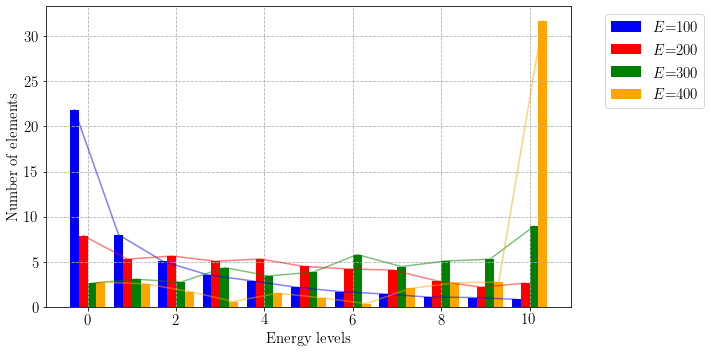

In [27]:
# averaged distribution of elements over states with zero demon value
plt.figure(figsize=(10,5))
plt.bar(levels-0.3, Ns_avg, width=0.2, color='b', align='center', label = '$E$=100')
plt.bar(levels-0.1, Ns_avg_200, width=0.2, color='r', align='center', label = '$E$=200')
plt.bar(levels+0.1, Ns_avg_300, width=0.2, color='g', align='center', label = '$E$=300')
plt.bar(levels+0.3, Ns_avg_400, width=0.2, color='orange', align='center', label = '$E$=400')
plt.grid(ls="--")
plt.xlabel(r"Energy levels", size=15)
plt.ylabel(r"Number of elements", size=15)
plt.xticks( fontsize=15)
plt.yticks(fontsize=15)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)
width = 0.2
colors = ['blue', 'red', 'green', 'orange']
for i, y_values in enumerate( [Ns_avg, Ns_avg_200, Ns_avg_300, Ns_avg_400] ):

  # moves the beginning of a line to the middle of the bar
    additional_space = (width*i) + (width/2);
  # x_values contains list indices plus additional space
    x_values = [ x -0.3 + 0.2*i for x,_ in enumerate( y_values ) ]
  # simply plot the values in y_values
    plt.plot( x_values, y_values, color=colors[i], alpha = 0.5 )

plt.tight_layout()
#plt.savefig('elements_distribution.png')

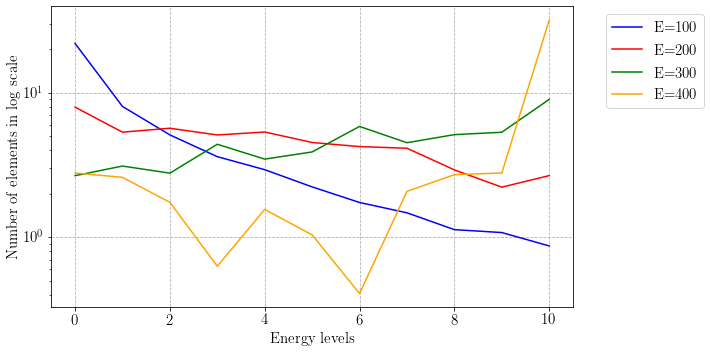

In [28]:
# averaged distribution of elements over states with zero demon value in log scale
plt.figure(figsize=(10,5))
plt.semilogy(levels, Ns_avg, color = 'b', label = 'E=100')
plt.semilogy(levels, Ns_avg_200, color = 'r', label = 'E=200')
plt.semilogy(levels, Ns_avg_300, color = 'g', label = 'E=300')
plt.semilogy(levels, Ns_avg_400, color = 'orange', label = 'E=400')
plt.xlabel(r"Energy levels", size=15)
plt.ylabel(r"Number of elements in log scale", size=15)
plt.grid(ls="--")
plt.xticks( fontsize=15)
plt.yticks(fontsize=15)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)
plt.tight_layout()
#plt.savefig('log_elements_distribution.png')

In [29]:
N=1000

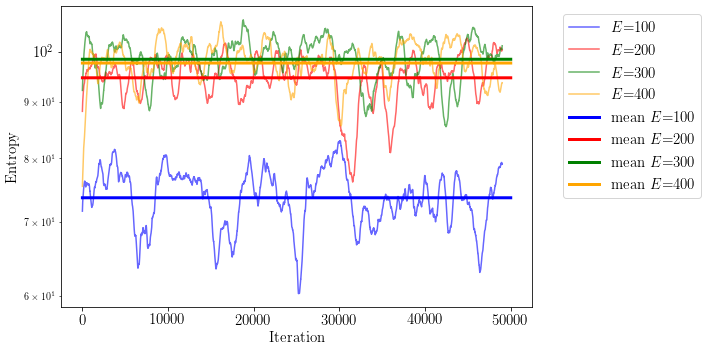

In [33]:
# Entropy of systems through iterations
plt.figure(figsize=(10,5))
plt.semilogy(np.convolve(Entropy, np.ones(N)/N, mode='valid'), color = 'b', alpha = 0.6, label = '$E$=100')
plt.semilogy(np.convolve(Entropy_200, np.ones(N)/N, mode='valid'), color = 'r', alpha = 0.6, label = '$E$=200')
plt.semilogy(np.convolve(Entropy_300, np.ones(N)/N, mode='valid'), color = 'g', alpha = 0.6, label = '$E$=300')
plt.semilogy(np.convolve(Entropy_400, np.ones(N)/N, mode='valid'), color = 'orange', alpha = 0.6, label = '$E$=400')
plt.plot(np.arange(len(Entropy)), Entropy.mean()*np.ones(len(Entropy)), color = 'blue', label = 'mean $E$=100',\
         linewidth=3)
plt.plot(np.arange(len(Entropy_200)), Entropy_200.mean()*np.ones(len(Entropy_200)), color = 'r', \
         label = 'mean $E$=200', linewidth=3)
plt.plot(np.arange(len(Entropy_300)), Entropy_300.mean()*np.ones(len(Entropy_300)), color = 'g',\
         label = 'mean $E$=300',linewidth=3)
plt.plot(np.arange(len(Entropy_400)), Entropy_400.mean()*np.ones(len(Entropy_400)), color = 'orange', \
         label ='mean $E$=400', linewidth=3)
plt.xlabel(r"Iteration", size = 15)
plt.ylabel(r"Entropy", size = 15)
plt.xticks( fontsize=15)
plt.yticks(fontsize=15)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)
plt.tight_layout()
#plt.savefig('entropy.png')

In [31]:
bin = 80
bins = np.arange(bin)

counts = np.histogram(demon, bins = bins)[0]
sum = np.sum(counts)
counts = counts/sum
level = np.histogram(demon, bins = bins)[1]
energy_levels = np.zeros(bin-1)
for i in np.arange(bin-1):
    energy_levels[i] = (level[i+1]+level[i])/2
popt, pcov = curve_fit(exp_approx, energy_levels, counts)

counts_200 = np.histogram(demon_200, bins = bins)[0]
sum = np.sum(counts_200)
counts_200 = counts_200/sum
level_200 = np.histogram(demon_200, bins = bins)[1]
energy_levels_200 = np.zeros(bin-1)
for i in np.arange(bin-1):
    energy_levels_200[i] = (level_200[i+1]+level_200[i])/2
popt_200, pcov_200 = curve_fit(exp_approx, energy_levels_200, counts_200)

counts_300 = np.histogram(demon_300, bins = bins)[0]
sum = np.sum(counts_300)
counts_300 = counts_300/sum
level_300 = np.histogram(demon_300, bins = bins)[1]
energy_levels_300 = np.zeros(bin-1)
for i in np.arange(bin-1):
    energy_levels_300[i] = (level_300[i+1]+level_300[i])/2
popt_300, pcov_300 = curve_fit(exp_approx, energy_levels_300, counts_300)

counts_400 = np.histogram(demon_400, bins = bins)[0]
sum = np.sum(counts_400)
counts_400 = counts_400/sum
level_400 = np.histogram(demon_400, bins = bins)[1]
energy_levels_400 = np.zeros(bin-1)
for i in np.arange(bin-1):
    energy_levels_400[i] = (level_400[i+1]+level_400[i])/2
popt_400, pcov_400 = curve_fit(exp_approx, energy_levels_400, counts_400)

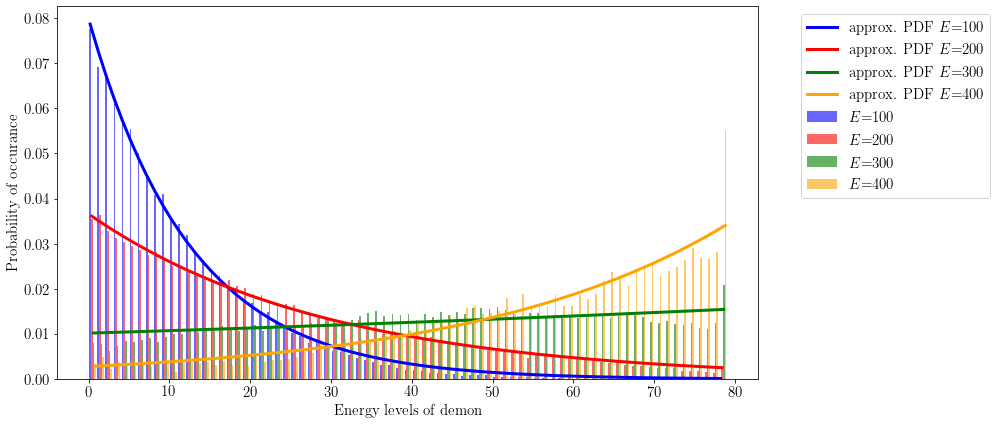

In [34]:
plt.figure(figsize=(14,6))
plt.bar(energy_levels-0.3, counts, color = 'b', align='center', width = 0.2, alpha = 0.6, label = '$E$=100')
plt.plot(energy_levels-0.3, (exp_approx(energy_levels,popt[0],popt[1])), color = 'b', linewidth=3, \
         label ="approx. PDF $E$=100")
plt.bar(energy_levels_200-0.1, counts_200, color = 'r', align='center', width = 0.2, alpha = 0.6, label = '$E$=200')
plt.plot(energy_levels_200-0.1, (exp_approx(energy_levels_200,popt_200[0],popt_200[1])), color = 'r', linewidth=3, \
         label ="approx. PDF $E$=200")
plt.bar(energy_levels_300+0.1, counts_300, color = 'g', align='center', width = 0.2, alpha = 0.6, label ='$E$=300')
plt.plot(energy_levels_300+0.1, (exp_approx(energy_levels_300,popt_300[0],popt_300[1])), color = 'g', linewidth=3, \
         label ="approx. PDF $E$=300")
plt.bar(energy_levels_400+0.3, counts_400, color = 'orange', align='center', width = 0.2, alpha = 0.6, label ='$E$=400')
plt.plot(energy_levels_400+0.3, (exp_approx(energy_levels_400,popt_400[0],popt_400[1])), color = 'orange', linewidth=3, \
         label ="approx. PDF $E$=400")
plt.xlabel(r"Energy levels of demon", size = 15)
plt.ylabel(r"Probability of occurance", size = 15)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)
plt.tight_layout()
#plt.savefig('demon.png')